In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras import layers as Layers

In [3]:
class ResBlock(Model):
    def __init__(self, channels, stride=1):
        super(ResBlock, self).__init__(name='ResBlock')
        self.flag = (stride != 1)
        self.conv1 = Conv2D(channels, 3, stride, padding='same')
        self.bn1 = BatchNormalization()
        self.conv2 = Conv2D(channels, 3, padding='same')
        self.bn2 = BatchNormalization()
        self.relu = ReLU()
        if self.flag:
            self.bn3 = BatchNormalization()
            self.conv3 = Conv2D(channels, 1, stride)

    def call(self, x):
        x1 = self.conv1(x)
        x1 = self.bn1(x1)
        x1 = self.relu(x1)
        x1 = self.conv2(x1)
        x1 = self.bn2(x1)
        if self.flag:
            x = self.conv3(x)
            x = self.bn3(x)
        x1 = Layers.add([x, x1])
        x1 = self.relu(x1)
        return x1


class ResNet34(Model):
    def __init__(self):
        super(ResNet34, self).__init__(name='ResNet34')
        self.conv1 = Conv2D(64, 7, 2, padding='same')
        self.bn = BatchNormalization()
        self.relu = ReLU()
        self.mp1 = MaxPooling2D(3, 2)

        self.conv2_1 = ResBlock(64)
        self.conv2_2 = ResBlock(64)
        self.conv2_3 = ResBlock(64)

        self.conv3_1 = ResBlock(128, 2)
        self.conv3_2 = ResBlock(128)
        self.conv3_3 = ResBlock(128)
        self.conv3_4 = ResBlock(128)

        self.conv4_1 = ResBlock(256, 2)
        self.conv4_2 = ResBlock(256)
        self.conv4_3 = ResBlock(256)
        self.conv4_4 = ResBlock(256)
        self.conv4_5 = ResBlock(256)
        self.conv4_6 = ResBlock(256)

        self.conv5_1 = ResBlock(512, 2)
        self.conv5_2 = ResBlock(512)
        self.conv5_3 = ResBlock(512)

        self.pool = GlobalAveragePooling2D()
        self.fc1 = Dense(512, activation='relu')
        self.dp1 = Dropout(0.5)
        self.fc2 = Dense(512, activation='relu')
        self.dp2 = Dropout(0.5)
        self.fc3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.bn(x)
        x = self.relu(x)
        x = self.mp1(x)

        x = self.conv2_1(x)
        x = self.conv2_2(x)
        x = self.conv2_3(x)

        x = self.conv3_1(x)
        x = self.conv3_2(x)
        x = self.conv3_3(x)
        x = self.conv3_4(x)

        x = self.conv4_1(x)
        x = self.conv4_2(x)
        x = self.conv4_3(x)
        x = self.conv4_4(x)
        x = self.conv4_5(x)
        x = self.conv4_6(x)

        x = self.conv5_1(x)
        x = self.conv5_2(x)
        x = self.conv5_3(x)

        x = self.pool(x)
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.fc2(x)
        x = self.dp2(x)
        x = self.fc3(x)
        return x

In [4]:
model = ResNet34()
model.build(input_shape=(None, 32, 32, 3))
model.summary()

Model: "ResNet34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  9472      
_________________________________________________________________
batch_normalization (BatchNo multiple                  256       
_________________________________________________________________
re_lu (ReLU)                 multiple                  0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
ResBlock (ResBlock)          multiple                  74368     
_________________________________________________________________
ResBlock (ResBlock)          multiple                  74368     
_________________________________________________________________
ResBlock (ResBlock)          multiple                  743

In [5]:
from tensorflow.keras.datasets import cifar10

In [1]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [8]:
x_val , y_val = x_train[40000:50000, :], y_train[40000:50000]
x_train, y_train = x_train[:40000, :], y_train[:40000]

In [9]:
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [10]:
# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [11]:
print(x_train.shape, x_val.shape, x_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)


In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
H = model.fit(x_train, y_train,
              batch_size=128, epochs=50, verbose=1,
              validation_data=(x_val, y_val))

Epoch 1/50
313/313 [==============================] - 38s 104ms/step - loss: 1.8183 - accuracy: 0.3437 - val_loss: 2.3363 - val_accuracy: 0.2068
Epoch 2/50
313/313 [==============================] - 30s 97ms/step - loss: 1.4098 - accuracy: 0.4992 - val_loss: 1.8083 - val_accuracy: 0.3356
Epoch 3/50
313/313 [==============================] - 31s 98ms/step - loss: 1.2356 - accuracy: 0.5724 - val_loss: 1.8176 - val_accuracy: 0.3927
Epoch 4/50
313/313 [==============================] - 31s 98ms/step - loss: 1.1918 - accuracy: 0.5923 - val_loss: 1.9397 - val_accuracy: 0.3939
Epoch 5/50
313/313 [==============================] - 31s 99ms/step - loss: 1.0753 - accuracy: 0.6352 - val_loss: 1.3838 - val_accuracy: 0.4965
Epoch 6/50
313/313 [==============================] - 31s 98ms/step - loss: 0.9992 - accuracy: 0.6629 - val_loss: 1.3362 - val_accuracy: 0.5622
Epoch 7/50
313/313 [==============================] - 31s 98ms/step - loss: 0.9734 - accuracy: 0.6726 - val_loss: 1.3698 - val_accuracy

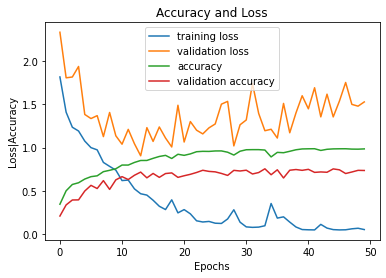

In [16]:
import matplotlib.pyplot as plt
import numpy as np
Epoch = 50
plt.plot(np.arange(0, Epoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, Epoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, Epoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, Epoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss|Accuracy')
plt.legend()
plt.show()

In [15]:
!pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)


In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[1.5627598762512207, 0.7337999939918518]
